## Imports

In [22]:
import numpy as np
import tensorflow as tf
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

## Load the data

In [2]:
# Load the dataset
shapefile_path = '/content/GWS_Merge_With_Physics.shp'

gdf = gpd.read_file(shapefile_path, encoding='ISO-8859-1', low_memory=False)

In [3]:
# Display the number of rows in the dataset
num_rows = len(gdf)
print(f"Number of rows in the dataset: {num_rows}")

# Display the column names
print("Columns in the dataset:")
print(gdf.columns)

Number of rows in the dataset: 51957
Columns in the dataset:
Index(['FileName', 'SystemID', 'Channel', 'SU', 'User', 'GPS_Date', 'GPS_Time',
       'CntTimeS', 'MeterType', 'Longitude', 'Latitude', 'Altitude', 'Gamma',
       'Gamma_CPS', 'PDOP', 'HDOP', 'VDOP', 'Sats', 'FixQuality', 'FixType',
       'GAMMA_RATE', 'Gamma_X60', 'Gamma_Unc', 'V', 'a', 'branch', 'r', 'R_1',
       'BKGD', 'theta', 'mu_a', 'S_dot', 'a_level', 'r_time', 'N_90', 'e_90',
       'delta_thet', 'e_theta', 'geometry'],
      dtype='object')


In [4]:
# Check for null values
print("Null values in the dataset:")
print(gdf.isnull().sum())

# Get summary statistics
print("Summary statistics:")
print(gdf.describe())


Null values in the dataset:
FileName          0
SystemID          0
Channel           0
SU                0
User          33931
GPS_Date          0
GPS_Time          0
CntTimeS          0
MeterType         0
Longitude         0
Latitude          0
Altitude          0
Gamma             0
Gamma_CPS         0
PDOP              0
HDOP              0
VDOP              0
Sats              0
FixQuality        0
FixType           0
GAMMA_RATE        0
Gamma_X60         0
Gamma_Unc       159
V                 0
a                 0
branch            0
r                 0
R_1               0
BKGD              0
theta             0
mu_a              0
S_dot             0
a_level           0
r_time            0
N_90              0
e_90              0
delta_thet        0
e_theta           0
geometry          0
dtype: int64
Summary statistics:
           SystemID  Channel            SU  CntTimeS  MeterType     Longitude  \
count  51957.000000  51957.0  51957.000000   51957.0    51957.0  51957.000000 

In [5]:
# Display data types of each column
print("Data types of each column:")
print(gdf.dtypes)

Data types of each column:
FileName        object
SystemID         int64
Channel          int64
SU               int64
User            object
GPS_Date        object
GPS_Time        object
CntTimeS         int64
MeterType        int64
Longitude      float64
Latitude       float64
Altitude       float64
Gamma          float64
Gamma_CPS      float64
PDOP           float64
HDOP           float64
VDOP           float64
Sats             int64
FixQuality      object
FixType         object
GAMMA_RATE       int64
Gamma_X60      float64
Gamma_Unc      float64
V                int64
a              float64
branch         float64
r                int64
R_1            float64
BKGD             int64
theta          float64
mu_a           float64
S_dot          float64
a_level        float64
r_time         float64
N_90           float64
e_90           float64
delta_thet     float64
e_theta        float64
geometry      geometry
dtype: object


In [6]:
# Check for duplicate rows
duplicates = gdf.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


## EDA

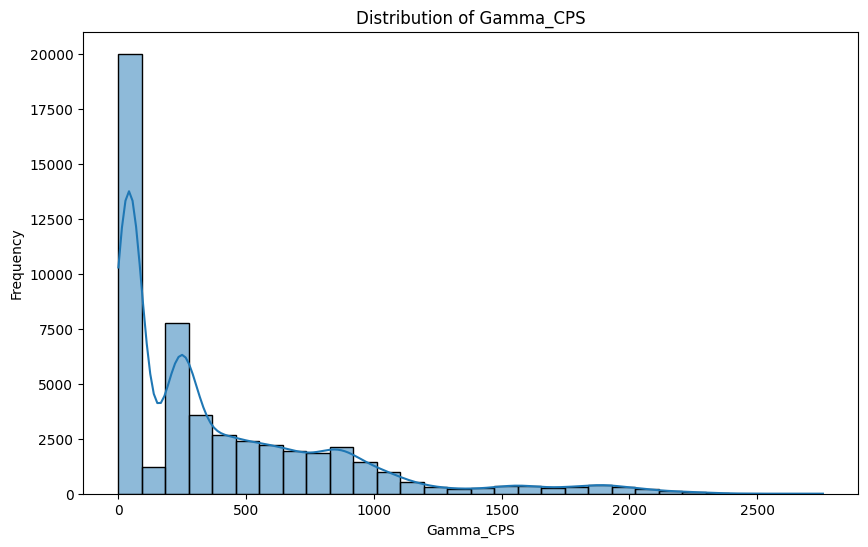

In [7]:
# Distribution of Gamma_CPS
plt.figure(figsize=(10, 6))
sns.histplot(gdf['Gamma_CPS'], kde=True, bins=30)
plt.title("Distribution of Gamma_CPS")
plt.xlabel("Gamma_CPS")
plt.ylabel("Frequency")
plt.show()

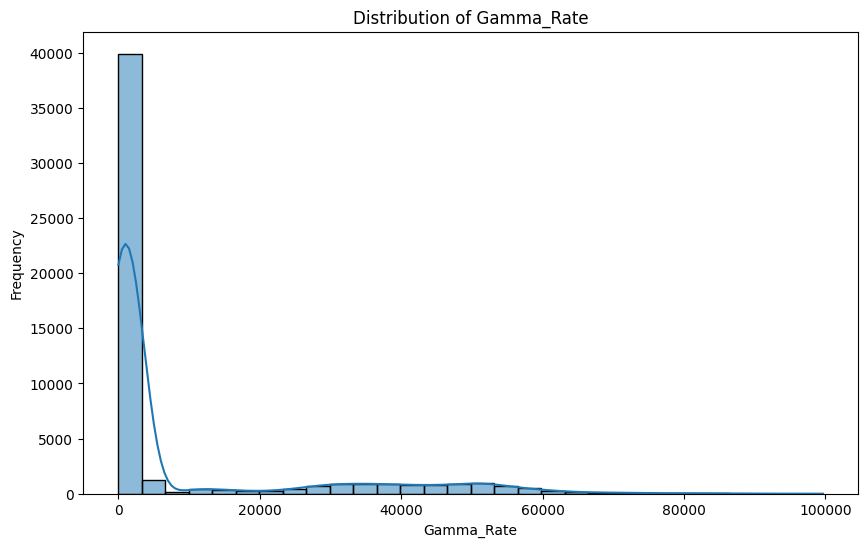

In [8]:
# Distribution of Gamma_CPS
plt.figure(figsize=(10, 6))
sns.histplot(gdf['GAMMA_RATE'], kde=True, bins=30)
plt.title("Distribution of Gamma_Rate")
plt.xlabel("Gamma_Rate")
plt.ylabel("Frequency")
plt.show()

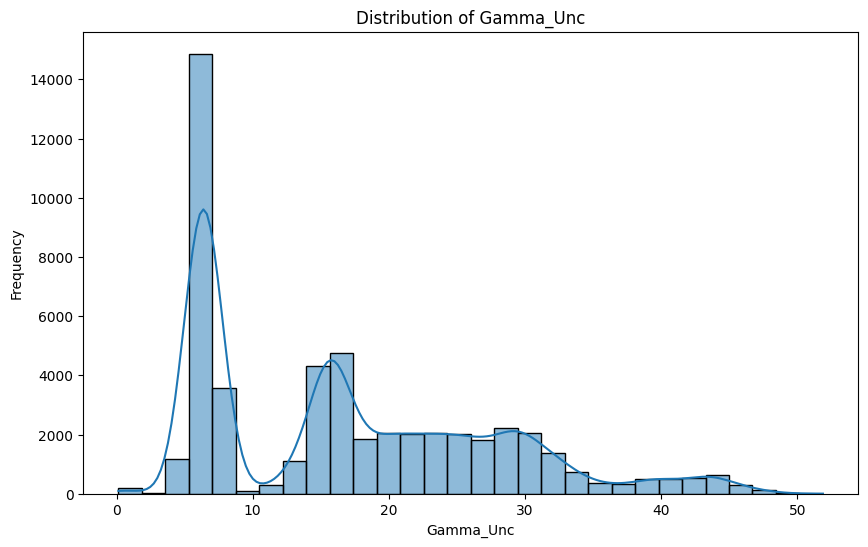

In [9]:
# Distribution of Gamma_CPS
plt.figure(figsize=(10, 6))
sns.histplot(gdf['Gamma_Unc'], kde=True, bins=30)
plt.title("Distribution of Gamma_Unc")
plt.xlabel("Gamma_Unc")
plt.ylabel("Frequency")
plt.show()

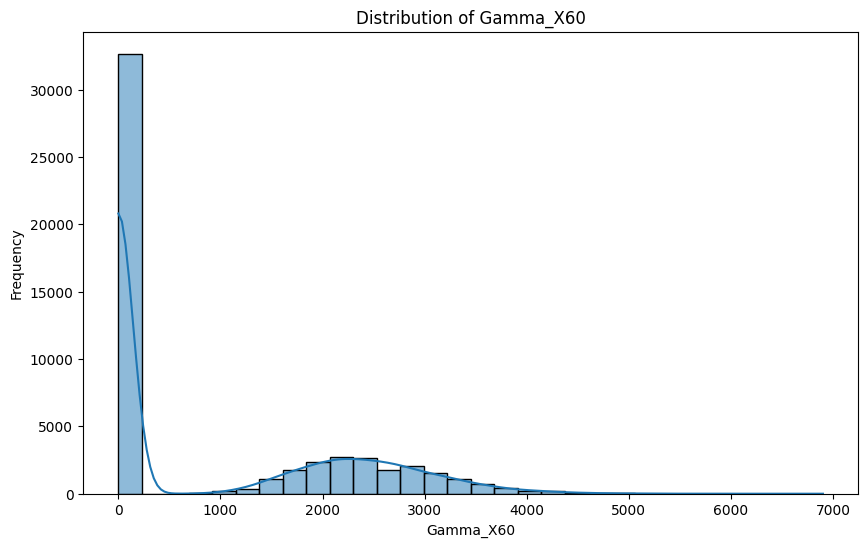

In [10]:
# Distribution of Gamma_CPS
plt.figure(figsize=(10, 6))
sns.histplot(gdf['Gamma_X60'], kde=True, bins=30)
plt.title("Distribution of Gamma_X60")
plt.xlabel("Gamma_X60")
plt.ylabel("Frequency")
plt.show()

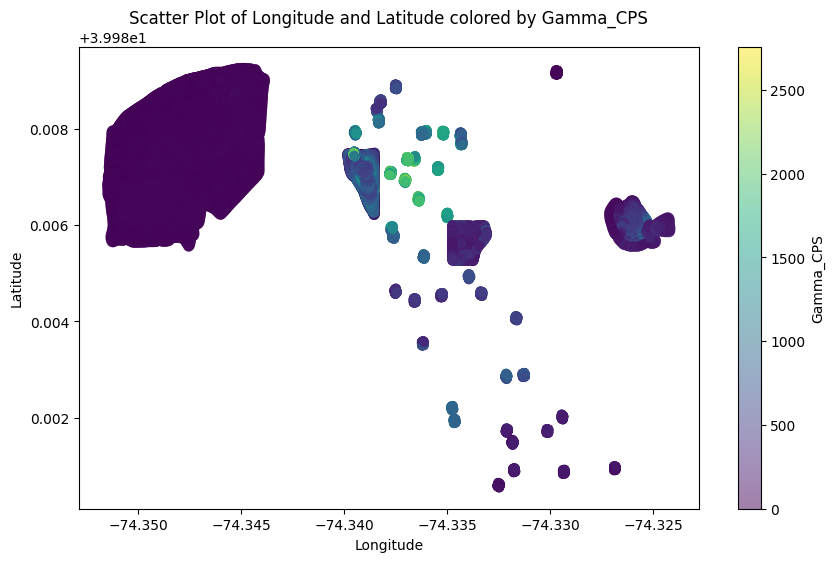

In [11]:
# Scatter plot of Longitude and Latitude colored by Gamma_CPS
plt.figure(figsize=(10, 6))
plt.scatter(gdf['Longitude'], gdf['Latitude'], c=gdf['Gamma_CPS'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Gamma_CPS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude and Latitude colored by Gamma_CPS')
plt.show()

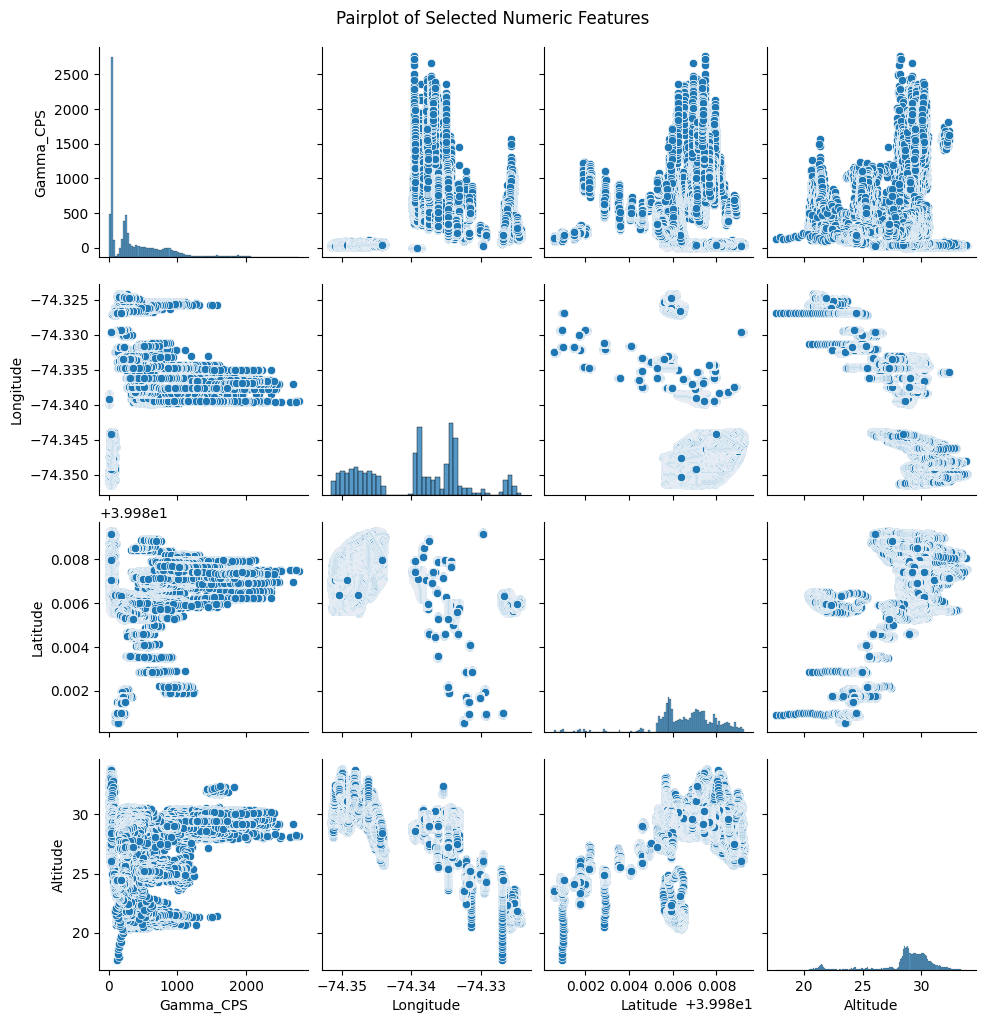

In [12]:
# Pairplot for numeric features
numeric_columns = ['Gamma_CPS', 'Longitude', 'Latitude', 'Altitude']
sns.pairplot(gdf[numeric_columns])
plt.suptitle('Pairplot of Selected Numeric Features', y=1.02)
plt.show()

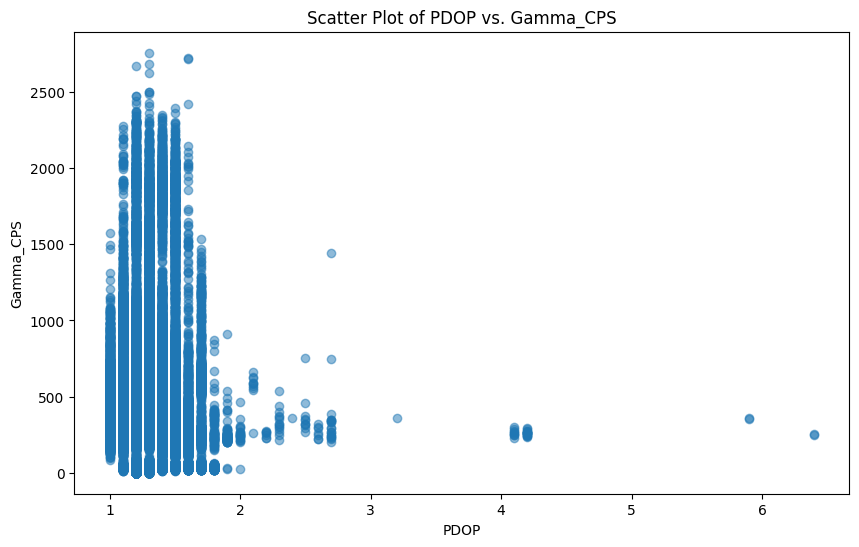

In [13]:
# Scatter plot of PDOP vs. Gamma_CPS
plt.figure(figsize=(10, 6))
plt.scatter(gdf['PDOP'], gdf['Gamma_CPS'], alpha=0.5)
plt.xlabel('PDOP')
plt.ylabel('Gamma_CPS')
plt.title('Scatter Plot of PDOP vs. Gamma_CPS')
plt.show()

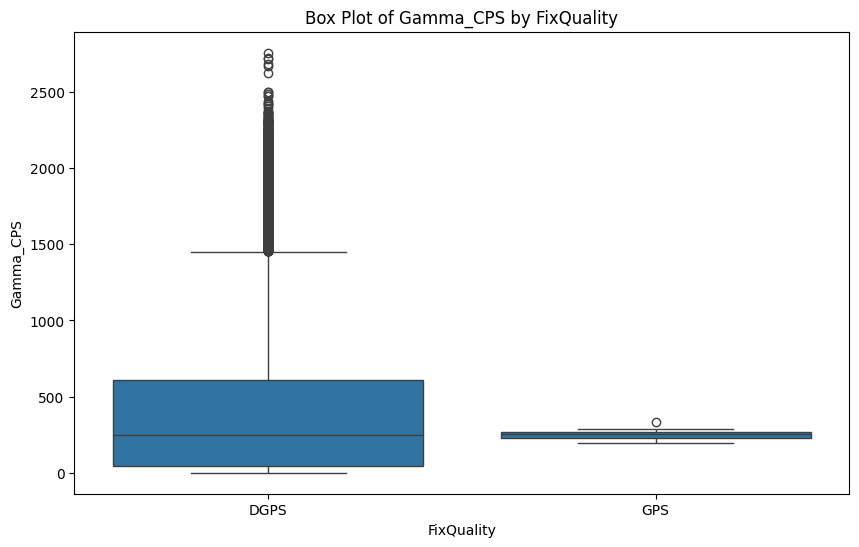

In [14]:
# Box plot of Gamma_CPS by FixQuality
plt.figure(figsize=(10, 6))
sns.boxplot(x='FixQuality', y='Gamma_CPS', data=gdf)
plt.title('Box Plot of Gamma_CPS by FixQuality')
plt.xlabel('FixQuality')
plt.ylabel('Gamma_CPS')
plt.show()


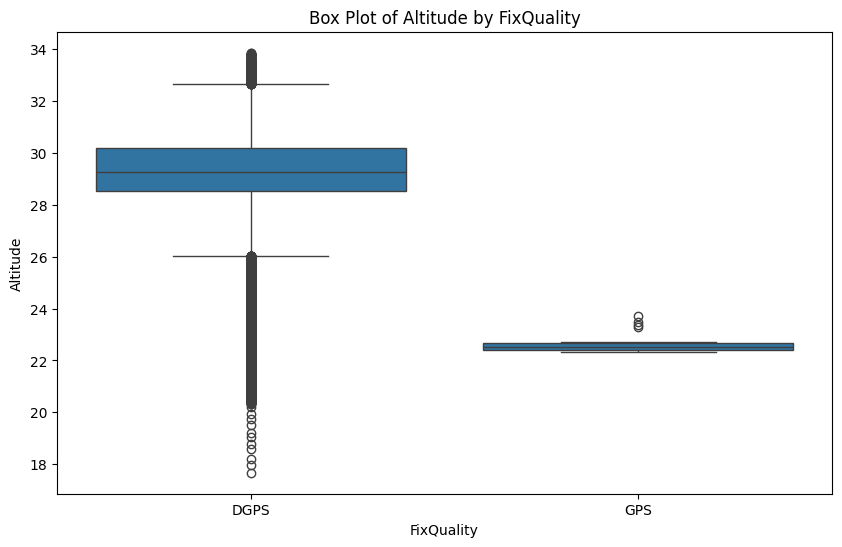

In [15]:
# Box plot of Altitude by FixQuality
plt.figure(figsize=(10, 6))
sns.boxplot(x='FixQuality', y='Altitude', data=gdf)
plt.title("Box Plot of Altitude by FixQuality")
plt.xlabel("FixQuality")
plt.ylabel("Altitude")
plt.show()


## Prepare data for training

In [16]:
# Define the columns to normalize
columns_to_normalize = ['Gamma_CPS', 'CntTimeS', 'a_level', 'BKGD']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
gdf[columns_to_normalize] = scaler.fit_transform(gdf[columns_to_normalize])

In [17]:
# Extract relevant columns
angles = gdf['theta'].values
rel_eff_data = gdf['Gamma_CPS'].values
acquisition_time = 1
alarm_level = float(gdf['a_level'].values[0])
background_count_rate = float(gdf['BKGD'].values[0])

# Constants and Parameters
Pdesired = 0.95
activity = 5.2  # uCi
branching_ratio = 0.8519
mass_attenuation_coeff = 0.02  # cm^2/g
air_density = 0.0294  # g/cm^2
v = 1  # speed of the detector/vehicle in meters per second
R_initial = 12  # initial guess in inches
time_t = acquisition_time
N_theta = 0.09
N_90 = 0.0011531318
B_dot = 6364

# Normalize angles to radians
angles_rad = np.deg2rad(angles)

In [18]:
# Split data into training and validation sets
angles_train, angles_validation, rel_eff_train, rel_eff_validation = train_test_split(
    angles_rad, rel_eff_data, test_size=0.2, random_state=42)

# Prepare training data
input_train = tf.convert_to_tensor(angles_train[:, np.newaxis], dtype=tf.float32)
rel_eff_train = tf.convert_to_tensor(rel_eff_train[:, np.newaxis], dtype=tf.float32)

# Prepare validation data
input_validation = tf.convert_to_tensor(angles_validation[:, np.newaxis], dtype=tf.float32)
rel_eff_validation = tf.convert_to_tensor(rel_eff_validation[:, np.newaxis], dtype=tf.float32)

## Define the model

In [19]:
class EnhancedPINN(tf.keras.Model):
    def __init__(self):
        super(EnhancedPINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(100, activation='relu')
        self.batch_norm1 = tf.keras.layers.BatchNormalization()
        self.dropout1 = tf.keras.layers.Dropout(0.2)

        self.dense2 = tf.keras.layers.Dense(100, activation='relu')
        self.batch_norm2 = tf.keras.layers.BatchNormalization()
        self.dropout2 = tf.keras.layers.Dropout(0.2)

        self.dense3 = tf.keras.layers.Dense(50, activation='relu')
        self.batch_norm3 = tf.keras.layers.BatchNormalization()
        self.dropout3 = tf.keras.layers.Dropout(0.2)

        self.dense4 = tf.keras.layers.Dense(50, activation='relu')
        self.batch_norm4 = tf.keras.layers.BatchNormalization()
        self.dropout4 = tf.keras.layers.Dropout(0.2)

        self.output_layer = tf.keras.layers.Dense(1, activation=None)

    def call(self, inputs):
        # Ensure inputs are reshaped to 2D
        inputs = tf.reshape(inputs, [-1, 1])  # Reshape to 2D

        hidden1 = self.dense1(inputs)
        hidden1 = self.batch_norm1(hidden1)
        hidden1 = self.dropout1(hidden1)

        hidden2 = self.dense2(hidden1)
        hidden2 = self.batch_norm2(hidden2)
        hidden2 = self.dropout2(hidden2)

        hidden3 = self.dense3(hidden2)
        hidden3 = self.batch_norm3(hidden3)
        hidden3 = self.dropout3(hidden3)

        hidden4 = self.dense4(hidden3)
        hidden4 = self.batch_norm4(hidden4)
        hidden4 = self.dropout4(hidden4)

        output = self.output_layer(hidden4)
        return output


def physics_loss(model, angles, rel_eff_data, params):
    Pdesired, activity, branching_ratio, mass_attenuation_coeff, air_density, R_initial, v, acquisition_time, background_count_rate, alarm_level = params
    angles_rad = tf.convert_to_tensor(angles[:, np.newaxis], dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(angles_rad)
        rel_eff = model(angles_rad)
        fluence_rate = activity * branching_ratio * rel_eff  # Simplified for illustration
        detection_probability = 1 - tf.math.exp(-fluence_rate * R_initial * air_density)  # Simplified
    B = background_count_rate * acquisition_time
    false_positive_prob = 1 - tf.math.exp(-B)
    loss = tf.reduce_mean(tf.square(detection_probability - Pdesired)) + tf.reduce_mean(tf.square(false_positive_prob - Pdesired))
    return loss

# Define the function to calculate the linear attenuation coefficient μa
def calculate_linear_attenuation_coefficient(mass_attenuation_coeff, air_density):
    return mass_attenuation_coeff * air_density


In [20]:
# Define a function to adjust the background count rate
def adjust_background_count_rate(background_count_rate, alarm_threshold_factor=1.5):
    # Scale the background count rate to fit within the desired range
    min_rate = 0.0
    max_rate = 8000.0
    scaled_background_count_rate = min(max(min_rate, background_count_rate), max_rate)
    adjusted_background_count_rate = scaled_background_count_rate * alarm_threshold_factor
    return adjusted_background_count_rate

# Define the calculate_immobile_MDD function
def calculate_immobile_MDD(model, angles, params, tolerance=1e-3):
    Pdesired, activity, branching_ratio, air_density, v, acquisition_time, background_count_rate = params
    adjusted_background_count_rate = adjust_background_count_rate(background_count_rate)

    R_min = 0
    R_max = 10000

    while (R_max - R_min) > tolerance:
        R_fix = (R_min + R_max) / 2
        current_params = (
            Pdesired, activity, branching_ratio, air_density, v, acquisition_time, adjusted_background_count_rate,
            ALARM_LEVEL, R_fix)

        angles_rad = np.deg2rad(angles)
        angles_rad = tf.convert_to_tensor(angles_rad[:, np.newaxis], dtype=tf.float32)

        # Get model predictions
        model_output = model(angles_rad)

        # Ensure model output is a tensor
        if isinstance(model_output, dict) and 'output' in model_output:
            rel_eff = model_output['output']
        elif isinstance(model_output, tf.Tensor):
            rel_eff = model_output
        else:
            raise ValueError("Unexpected format for model output.")

        # Ensure the shape is as expected
        if rel_eff.shape != (angles_rad.shape[0], 1):
            raise ValueError(f"Unexpected shape for rel_eff: {rel_eff.shape}, expected {(angles_rad.shape[0], 1)}")

        fluence_rate = activity * branching_ratio * rel_eff
        detection_probability = 1 - tf.math.exp(-fluence_rate * R_fix * air_density / adjusted_background_count_rate)
        mean_detection_probability = tf.reduce_mean(detection_probability).numpy()

        print(
            f"R_min: {R_min}, R_max: {R_max}, R_fix: {R_fix}, Mean Detection Probability: {mean_detection_probability}")

        if mean_detection_probability >= Pdesired:
            R_max = R_fix
        else:
            R_min = R_fix

    return R_fix

# Define the calculate_mobile_MDD function
def calculate_mobile_MDD(model, angles, params, tolerance=1e-3):
    Pdesired, activity, branching_ratio, air_density, v, acquisition_time, background_count_rate = params
    adjusted_background_count_rate = adjust_background_count_rate(background_count_rate)

    R_min = 0
    R_fix = calculate_immobile_MDD(model, angles, params, tolerance=tolerance)  # Starting point for mobile MDD
    R_max = 2 * R_fix  # Initial doubling of R_fix

    while (R_max - R_min) > tolerance:
        R_test = (R_max + R_min) / 2
        total_detection_prob = 0.0
        distance_traveled = 0.0
        current_distance_per_step = v * ACQUISITION_TIME

        step_count = 0
        while distance_traveled < R_test:
            angle_rad = np.arcsin(distance_traveled / R_test)
            angles_rad = tf.convert_to_tensor([[angle_rad]], dtype=tf.float32)

            # Get model predictions
            model_output = model(angles_rad)

            # Ensure model output is a tensor
            if isinstance(model_output, dict) and 'output' in model_output:
                rel_eff = model_output['output']
            elif isinstance(model_output, tf.Tensor):
                rel_eff = model_output
            else:
                raise ValueError("Unexpected format for model output.")

            # Ensure the shape is as expected
            if rel_eff.shape != (angles_rad.shape[0], 1):
                raise ValueError(f"Unexpected shape for rel_eff: {rel_eff.shape}, expected {(angles_rad.shape[0], 1)}")

            fluence_rate = activity * branching_ratio * rel_eff
            detection_prob = 1 - tf.math.exp(-fluence_rate * R_test * air_density / adjusted_background_count_rate)
            total_detection_prob += detection_prob
            distance_traveled += current_distance_per_step

            step_count += 1
            if step_count > 10000:  # Break if too many steps to prevent infinite loop
                print(f"Breaking loop at step {step_count} to prevent infinite loop.")
                break

        mean_total_detection_prob = tf.reduce_mean(total_detection_prob).numpy()
        print(f"R_test: {R_test}, Mean Total Detection Probability: {mean_total_detection_prob}, Speed: {v}, Steps: {step_count}")

        if mean_total_detection_prob >= Pdesired:
            R_max = R_test
        else:
            R_min = R_test

    return R_test

# Define a function to calculate the maximum detectable distance (MDD)
def calculate_mdd(model, angles, params, is_mobile, tolerance):
    if is_mobile:
        return calculate_mobile_MDD(model, angles, params, tolerance)
    else:
        return calculate_immobile_MDD(model, angles, params, tolerance)

## Model training

In [24]:
# Create and compile the Enhanced PINN model
model = EnhancedPINN()

# Define the optimizer with a learning rate scheduler
initial_learning_rate = 1e-7
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile the model with adjusted loss function and physics loss weight
physics_loss_weight = 0.1  # Adjust based on your problem and losses scaling
params = (Pdesired, activity, branching_ratio, mass_attenuation_coeff, air_density, R_initial, v, acquisition_time, background_count_rate, alarm_level)

# Calculate normalization factors
data_loss_normalization_factor = tf.reduce_mean(tf.square(rel_eff_train))
angles_rad = tf.convert_to_tensor(np.deg2rad(angles)[:, np.newaxis], dtype=tf.float32)
rel_eff_initial = model(angles_rad)
physics_loss_initial = physics_loss(model, angles, rel_eff_data, params)
physics_loss_normalization_factor = tf.reduce_mean(tf.square(physics_loss_initial))  # Adjust as needed

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training parameters
num_epochs = 30
batch_size = 16

@tf.function
def train_step(input_batch, rel_eff_batch):
    with tf.GradientTape() as tape:
        rel_eff_predicted = model(input_batch)
        data_loss = tf.reduce_mean(tf.square(rel_eff_predicted - rel_eff_batch))
        physics_loss_value = physics_loss(model, input_batch, rel_eff_batch, params)

        data_loss_normalized = data_loss / data_loss_normalization_factor
        physics_loss_normalized = physics_loss_value / physics_loss_normalization_factor

        total_loss = (physics_loss_weight * physics_loss_normalized) + data_loss_normalized

    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return total_loss

# Training loop
for epoch in range(num_epochs):
    # Shuffle and batch the training data
    indices = tf.range(start=0, limit=tf.shape(input_train)[0], dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices)
    input_train_shuffled = tf.gather(input_train, shuffled_indices)
    rel_eff_train_shuffled = tf.gather(rel_eff_train, shuffled_indices)

    for i in range(0, len(input_train), batch_size):
        input_batch = input_train_shuffled[i:i+batch_size]
        rel_eff_batch = rel_eff_train_shuffled[i:i+batch_size]

        total_loss = train_step(input_batch, rel_eff_batch)

    # Validation loss calculation
    rel_eff_validation_predicted = model(input_validation)
    data_loss_validation = tf.reduce_mean(tf.square(rel_eff_validation_predicted - rel_eff_validation))
    physics_loss_validation = physics_loss(model, input_validation, rel_eff_validation, params)

    data_loss_validation_normalized = data_loss_validation / data_loss_normalization_factor
    physics_loss_validation_normalized = physics_loss_validation / physics_loss_normalization_factor

    total_loss_validation = (physics_loss_weight * physics_loss_validation_normalized) + data_loss_validation_normalized

    # Print validation loss
    print(f"Epoch {epoch}: Validation Loss: {total_loss_validation.numpy()}")

    # Early stopping check
    if epoch > 0 and total_loss_validation > prev_val_loss:
        patience_count += 1
    else:
        patience_count = 0

    if patience_count > early_stopping.patience:
        print(f"Early stopping at epoch {epoch} with validation loss: {total_loss_validation.numpy()}")
        break

    prev_val_loss = total_loss_validation

# Final evaluation on the validation set
physics_loss_value_validation = physics_loss(model, angles_validation, rel_eff_validation, params)
data_loss_value_validation = tf.reduce_mean(tf.square(model(input_validation) - rel_eff_validation))

physics_loss_value_validation_normalized = physics_loss_value_validation / physics_loss_normalization_factor
data_loss_value_validation_normalized = data_loss_value_validation / data_loss_normalization_factor

total_loss_validation = (physics_loss_weight * physics_loss_value_validation_normalized) + data_loss_value_validation_normalized

print(f"Final Validation Loss: {total_loss_validation.numpy()}")


Epoch 0: Validation Loss: 1.0651401281356812
Epoch 1: Validation Loss: 1.003596544265747
Epoch 2: Validation Loss: 0.946918249130249
Epoch 3: Validation Loss: 0.8944801092147827
Epoch 4: Validation Loss: 0.8469748497009277
Epoch 5: Validation Loss: 0.8042253851890564
Epoch 6: Validation Loss: 0.7666852474212646
Epoch 7: Validation Loss: 0.7351273894309998
Epoch 8: Validation Loss: 0.7094577550888062
Epoch 9: Validation Loss: 0.6892104148864746
Epoch 10: Validation Loss: 0.6745450496673584
Epoch 11: Validation Loss: 0.664536714553833
Epoch 12: Validation Loss: 0.6580438017845154
Epoch 13: Validation Loss: 0.6541075706481934
Epoch 14: Validation Loss: 0.6517884731292725
Epoch 15: Validation Loss: 0.6504082679748535
Epoch 16: Validation Loss: 0.6495460867881775
Epoch 17: Validation Loss: 0.6490444540977478
Epoch 18: Validation Loss: 0.6487289667129517
Epoch 19: Validation Loss: 0.6485399007797241
Epoch 20: Validation Loss: 0.6484119296073914
Epoch 21: Validation Loss: 0.6483290195465088
E

In [25]:
# Evaluate the model on training data
rel_eff_train_predicted = model(input_train)
data_loss_train = tf.reduce_mean(tf.square(rel_eff_train_predicted - rel_eff_train))
physics_loss_train = physics_loss(model, input_train, rel_eff_train, params)

data_loss_train_normalized = data_loss_train / data_loss_normalization_factor
physics_loss_train_normalized = physics_loss_train / physics_loss_normalization_factor

total_loss_train = (physics_loss_weight * physics_loss_train_normalized) + data_loss_train_normalized

print(f"Final Training Loss: {total_loss_train.numpy()}")

Final Training Loss: 0.6130384802818298


In [26]:
# Evaluate the model on validation data
rel_eff_validation_predicted = model(input_validation)
data_loss_validation = tf.reduce_mean(tf.square(rel_eff_validation_predicted - rel_eff_validation))
physics_loss_validation = physics_loss(model, input_validation, rel_eff_validation, params)

data_loss_validation_normalized = data_loss_validation / data_loss_normalization_factor
physics_loss_validation_normalized = physics_loss_validation / physics_loss_normalization_factor

total_loss_validation = (physics_loss_weight * physics_loss_validation_normalized) + data_loss_validation_normalized

print(f"Final Validation Loss: {total_loss_validation.numpy()}")

Final Validation Loss: 0.6481523513793945


In [29]:
# Calculate performance metrics
mae_train = tf.reduce_mean(tf.abs(rel_eff_train_predicted - rel_eff_train))
mae_validation = tf.reduce_mean(tf.abs(rel_eff_validation_predicted - rel_eff_validation))

print(f"Mean Absolute Error on Training Data: {mae_train.numpy()}")
print(f"Mean Absolute Error on Validation Data: {mae_validation.numpy()}")

Mean Absolute Error on Training Data: 0.12666818499565125
Mean Absolute Error on Validation Data: 0.1299176961183548


## save the model

In [30]:
model.save('/content/my_model.tf', save_format='tf')

In [31]:
!zip -r /content/my_model.zip /content/my_model.tf

  adding: content/my_model.tf/ (stored 0%)
  adding: content/my_model.tf/keras_metadata.pb (deflated 90%)
  adding: content/my_model.tf/fingerprint.pb (stored 0%)
  adding: content/my_model.tf/variables/ (stored 0%)
  adding: content/my_model.tf/variables/variables.index (deflated 64%)
  adding: content/my_model.tf/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: content/my_model.tf/assets/ (stored 0%)
  adding: content/my_model.tf/saved_model.pb (deflated 91%)


In [32]:
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>